<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Mean-Encoding-with-smoothing-regularization-parameter." data-toc-modified-id="Mean-Encoding-with-smoothing-regularization-parameter.-1">Mean Encoding with smoothing regularization parameter.</a></span><ul class="toc-item"><li><span><a href="#What-if-we-have-missing-values-in-input-categorical-variable.-let's-see" data-toc-modified-id="What-if-we-have-missing-values-in-input-categorical-variable.-let's-see-1.1">What if we have missing values in input categorical variable. let's see</a></span></li><li><span><a href="#Transform-values-on-unseen-data" data-toc-modified-id="Transform-values-on-unseen-data-1.2">Transform values on unseen data</a></span></li><li><span><a href="#Let's-try-with-different-input-scenarios" data-toc-modified-id="Let's-try-with-different-input-scenarios-1.3">Let's try with different input scenarios</a></span></li><li><span><a href="#Can-this-applied-if-target-variable-is-continous-data?-Let's-see" data-toc-modified-id="Can-this-applied-if-target-variable-is-continous-data?-Let's-see-1.4">Can this applied if target variable is continous data? Let's see</a></span></li><li><span><a href="#Let's-implement-multi-class-classification" data-toc-modified-id="Let's-implement-multi-class-classification-1.5">Let's implement multi class classification</a></span></li></ul></li><li><span><a href="#Leave-one-out-mean-encoding" data-toc-modified-id="Leave-one-out-mean-encoding-2">Leave one out mean encoding</a></span></li><li><span><a href="#Target-Encoding" data-toc-modified-id="Target-Encoding-3">Target Encoding</a></span></li><li><span><a href="#CatBoost-Encoder" data-toc-modified-id="CatBoost-Encoder-4">CatBoost Encoder</a></span></li></ul></div>

Mean target encoding in one of the effective encoding method. This content is not intended to explain the importance/introduction of encoding/mean encoding. It's intended to exploring how to implement various versions of mean target encoding in python. This is more like practical approach, but whenever it is needed I will explain why I've chosen a particular version of mean encoding over others. If someone wants to know about mean encoding one can check [this.](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv) (3 videos).

## Mean Encoding with smoothing regularization parameter. 

Why regularization is needed: In short, to avoid overfitting. As we are using target variable information in the mean encoding calculation. There is a high chance to the model is overfitted. Smoothing is one method to avoid overfitting. But it needs tuning for optimal smoothing parameter. Below is the formula to obtain smoothed mean encoding value of a level in a categorical variable. Alpha is the smoothing parameter. If alpha=0 no smoothing(regularization) will be  applied, it just returns the regular mean encoding value. If high value of alpha is chosen then the global mean get high weightage and that value dominates the mean encoded value.

globalmean = mean of response variable

mean(target) = the mean of filtered target variable (filtered by a level in categorical variable).

nrows = number of elements in the filtered dataset.

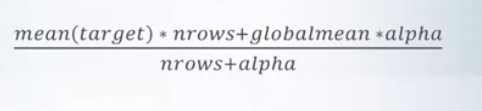

In [1]:
#import pyforest
import pandas as pd
import numpy as np

In [2]:
# let's consider the sample data set
df=pd.DataFrame({'A':['a','b','c','a','b','c','a','b','c'],
                 'target':[1,0,1,0,1,1,0,1,0]
                })
df

,A,target
0,a,1
1,b,0
2,c,1
3,a,0
4,b,1
5,c,1
6,a,0
7,b,1
8,c,0


In [3]:
import category_encoders as ce
ce.__version__

# Encoded values with out regularization
# a- 1/3 - 0.3333(mean)
# b- 2/3 - 0.6666(mean)
# c- 2/3 - 0.6666(mean)

'2.1.0'

In [4]:
X = df.drop('target', axis = 1)
y = df.target
type(X),type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [5]:
# Mean Encoding with smoothing regularization parameter. 
Mean_encoding=ce.m_estimate.MEstimateEncoder()
X_new=Mean_encoding.fit_transform(X,y)
X_new  #By default it returns pandas dataframe, can get numpy array also by changing the parameter values in the encoding method.

# Gives mean encoded values with regularization ('m' or 'alpha'= 1 default value)

,A
0,0.388889
1,0.638889
2,0.638889
3,0.388889
4,0.638889
5,0.638889
6,0.388889
7,0.638889
8,0.638889


### What if we have missing values in input categorical variable. let's see

In [6]:
df=pd.DataFrame({'A':['a','b','c','a','b','c','a','b','c',np.nan],
                 'target':[1,0,1,0,1,1,0,1,0,0]
                })
df

,A,target
0,a,1
1,b,0
2,c,1
3,a,0
4,b,1
5,c,1
6,a,0
7,b,1
8,c,0
9,NaN,0


In [7]:
X = df.drop('target', axis = 1).values
y = df.target.values 
type(X),type(y)
# Earlier we passed pandas objects, here we passes numpy arrays

(numpy.ndarray, numpy.ndarray)

In [8]:
Mean_encoding=ce.m_estimate.MEstimateEncoder(return_df=False)
X_new=Mean_encoding.fit_transform(X,y)
X_new  # Now the output is numpy array. we controlled this with 'return_df' argument 

array([[0.375],
       [0.625],
       [0.625],
       [0.375],
       [0.625],
       [0.625],
       [0.375],
       [0.625],
       [0.625],
       [0.25 ]])

- It considered 'Nan' as one among the variable levels. We can handle the missing values separately if we want, with input argument 'handle_missing'. Let's try with different value of this argument.

In [9]:
# With handle_missing='error'
Mean_encoding=ce.m_estimate.MEstimateEncoder(handle_missing='error')
# X_new=Mean_encoding.fit_transform(X,y)

# Raises value error if missing values are encountered in training phase.
# For readability purpose I didn't shown the output here.

In [10]:
# With handle_missing='return_nan'
Mean_encoding=ce.m_estimate.MEstimateEncoder(handle_missing='return_nan')
X_new=Mean_encoding.fit_transform(X,y)
X_new  
# It returns Nan value for missing values 

,0
0,0.375
1,0.625
2,0.625
3,0.375
4,0.625
5,0.625
6,0.375
7,0.625
8,0.625
9,NaN


In [11]:
# With handle_missing='value'
Mean_encoding=ce.m_estimate.MEstimateEncoder(handle_missing='value')
X_new=Mean_encoding.fit_transform(X,y)
X_new  

# The default value is for this argument is 'value'. It treats Nan's as one among the class levels and
# compute the encoded value as usual. But in documentation it is mentioned that it will return the global mean(prior prob)

,0
0,0.375
1,0.625
2,0.625
3,0.375
4,0.625
5,0.625
6,0.375
7,0.625
8,0.625
9,0.250


### Transform values on unseen data

In [12]:
Mean_encoding.transform(['d']) # 'd' is unseen data

# It returns the global mean value.(A reasonable metric to substitute for unknown category while performing mean encoding).
# One good thing in category_encoders package is it will nicely handle the unknown values while transforming.
# If we set the value of 'handle_unknown' to 'return_nan' it will return Nan
# If we set the value of 'handle_unknown' to 'error' it will raise an error

,0
0,0.5


### Let's try with different input scenarios

- **Let's work with pandas data frame as input**

In [13]:
df=pd.DataFrame({'A':['a','b','c','a','b','c','a','b','c'],
                 'B':[1,2,3,4,1,2,3,4,1],
                 'target':[1,0,1,0,1,1,0,1,0]
                })
df.head()

,A,B,target
0,a,1,1
1,b,2,0
2,c,3,1
3,a,4,0
4,b,1,1


In [14]:
X = df.drop('target', axis = 1)
y = df.target
type(X),type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [15]:
Mean_encoding=ce.m_estimate.MEstimateEncoder()
X_new=Mean_encoding.fit_transform(X,y)
X_new

,A,B
0,0.388889,1
1,0.638889,2
2,0.638889,3
3,0.388889,4
4,0.638889,1
5,0.638889,2
6,0.388889,3
7,0.638889,4
8,0.638889,1


By default it encodes all the string coulmns. Can we encode the 2nd column also by specifying 'cols' argument? let's see

In [16]:
Mean_encoding=ce.m_estimate.MEstimateEncoder(cols=[0,1])
# X_new=Mean_encoding.fit_transform(X,y) #commented for readability purpose
# X_new

# raises Key error, So indices are not allowed. I tried with (cols=[0]) also

In [17]:
# let's try with column names
Mean_encoding=ce.m_estimate.MEstimateEncoder(cols=['A','B'])
X_new=Mean_encoding.fit_transform(X,y)
X_new

# So, we can encode the numeric values also, by specifying the column names(not indices)

,A,B
0,0.388889,0.638889
1,0.638889,0.518519
2,0.638889,0.518519
3,0.388889,0.518519
4,0.638889,0.638889
5,0.638889,0.518519
6,0.388889,0.518519
7,0.638889,0.518519
8,0.638889,0.638889


So by passing pandas dataframe we have a flexibility to encode any column.

- **Let's work with numpy arrays as input**

In [18]:
X = df.drop('target', axis = 1).values
y = df.target.values
type(X),type(y)

(numpy.ndarray, numpy.ndarray)

We know, by default it encodes all the string columns. lets see if it can encodes numeric columns by specifying 'cols' argument

In [19]:
Mean_encoding=ce.m_estimate.MEstimateEncoder(cols=[0,1])
X_new=Mean_encoding.fit_transform(X,y)
X_new

,0,1
0,0.388889,0.638889
1,0.638889,0.518519
2,0.638889,0.518519
3,0.388889,0.518519
4,0.638889,0.638889
5,0.638889,0.518519
6,0.388889,0.518519
7,0.638889,0.518519
8,0.638889,0.638889


So we get the same flexibility of encoding any column by specifying indices in 'col' argument when working with numpy arrays.

- 'Col' will take column **names**  if the input data is in pandas dataframe and can encode any columns that specified in 'cols'. Without cols argument it encodes all string columns.

- 'Col' will take column **indices** if the input data is in numpy arrays and can encode any columns that specified in 'cols'. Without cols argument it encodes all string columns.

### Can this applied if target variable is continous data? Let's see

In [20]:
df=pd.DataFrame({'A':['a','b','c','a','b','c','a','b','c'],
                 'target':[123.5,100,120.3,101,108.7,109,100,113,110]
                })
df.head()

,A,target
0,a,123.5
1,b,100.0
2,c,120.3
3,a,101.0
4,b,108.7


In [21]:
X = df.drop('target', axis = 1)
y = df.target
type(X),type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [22]:
Mean_encoding=ce.m_estimate.MEstimateEncoder()
X_new=Mean_encoding.fit_transform(X,y)
X_new
#It works well as expected

,A
0,108.5
1,107.8
2,112.2
3,108.5
4,107.8
5,112.2
6,108.5
7,107.8
8,112.2


### Let's implement multi class classification

In [23]:
# let's consider the sample data set
df=pd.DataFrame({'A':['a','b','c','a','b','c','a','b','c','a','b','c','a','b','c','a','b','c'],
                 'target':[1,0,1,0,1,1,0,1,0,2,0,2,2,1,2,0,1,0]
                })
df

,A,target
0,a,1
1,b,0
2,c,1
3,a,0
4,b,1
5,c,1
6,a,0
7,b,1
8,c,0
9,a,2


In [24]:
X = df.drop('target', axis = 1)
y = df.target

Mean_encoding=ce.m_estimate.MEstimateEncoder()
X_new=Mean_encoding.fit_transform(X,y)
X_new

,A
0,0.833333
1,0.690476
2,0.976190
3,0.833333
4,0.690476
5,0.976190
6,0.833333
7,0.690476
8,0.976190
9,0.833333


It consider target variable to be continuous variable and calculated the mean. If it make sense to the analysis we can proceed with this encoding value. Otherwise there is another hack to get mean encoding values for each class. 
That is representing the presence of each category in target variable in binary form (can get by doing standard one hot encoding). Let's see how to implement this.

In [25]:
# let's consider the sample data set
df=pd.DataFrame({'A':['a','b','c','a','b','c','a','b','c','a','b','c','a','b','c','a','b','c'],
                 'target_0':[0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,1],
                 'target_1':[1,0,1,0,1,1,0,1,0,0,0,0,0,1,0,0,1,0],
                 'target_2':[0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0]
                })
df

,A,target_0,target_1,target_2
0,a,0,1,0
1,b,1,0,0
2,c,0,1,0
3,a,1,0,0
4,b,0,1,0
5,c,0,1,0
6,a,1,0,0
7,b,0,1,0
8,c,1,0,0
9,a,0,0,1


In [26]:
# Encoded value obtained from level '0' 
Mean_encoding=ce.m_estimate.MEstimateEncoder()
X_new=Mean_encoding.fit_transform(df['A'],df['target_0'])
df['target_0_encoded']=X_new
X_new

,A
0,0.484127
1,0.341270
2,0.341270
3,0.484127
4,0.341270
5,0.341270
6,0.484127
7,0.341270
8,0.341270
9,0.484127


In [27]:
# Encoded value obtained from level '1'
Mean_encoding=ce.m_estimate.MEstimateEncoder()
X_new=Mean_encoding.fit_transform(df['A'],df['target_1'])
df['target_1_encoded']=X_new
X_new

,A
0,0.198413
1,0.626984
2,0.341270
3,0.198413
4,0.626984
5,0.341270
6,0.198413
7,0.626984
8,0.341270
9,0.198413


In [28]:
# Encoded value obtained from level '2'
Mean_encoding=ce.m_estimate.MEstimateEncoder()
X_new=Mean_encoding.fit_transform(df['A'],df['target_2'])
df['target_2_encoded']=X_new
X_new

,A
0,0.317460
1,0.031746
2,0.317460
3,0.317460
4,0.031746
5,0.317460
6,0.317460
7,0.031746
8,0.317460
9,0.317460


In [29]:
df

,A,target_0,target_1,target_2,target_0_encoded,target_1_encoded,target_2_encoded
0,a,0,1,0,0.484127,0.198413,0.317460
1,b,1,0,0,0.341270,0.626984,0.031746
2,c,0,1,0,0.341270,0.341270,0.317460
3,a,1,0,0,0.484127,0.198413,0.317460
4,b,0,1,0,0.341270,0.626984,0.031746
5,c,0,1,0,0.341270,0.341270,0.317460
6,a,1,0,0,0.484127,0.198413,0.317460
7,b,0,1,0,0.341270,0.626984,0.031746
8,c,1,0,0,0.341270,0.341270,0.317460
9,a,0,0,1,0.484127,0.198413,0.317460


If we use tree based algorithms for our problem we can keep these three encoded variables. Otherwise we can remove any one of them to just eliminate multicollinearity effect(the sum of three variables will be one).

In [30]:
df['sum']=df['target_0_encoded']+df['target_1_encoded']+df['target_2_encoded']
df

,A,target_0,target_1,target_2,target_0_encoded,target_1_encoded,target_2_encoded,sum
0,a,0,1,0,0.484127,0.198413,0.317460,1.0
1,b,1,0,0,0.341270,0.626984,0.031746,1.0
2,c,0,1,0,0.341270,0.341270,0.317460,1.0
3,a,1,0,0,0.484127,0.198413,0.317460,1.0
4,b,0,1,0,0.341270,0.626984,0.031746,1.0
5,c,0,1,0,0.341270,0.341270,0.317460,1.0
6,a,1,0,0,0.484127,0.198413,0.317460,1.0
7,b,0,1,0,0.341270,0.626984,0.031746,1.0
8,c,1,0,0,0.341270,0.341270,0.317460,1.0
9,a,0,0,1,0.484127,0.198413,0.317460,1.0


We can follow the same process transforming on test data. Special care should be taken when transforming on new level in test data. For that observation we get the encoded array as [0.5 , 0.5, 0.5]. We should covert it to [1/3, 1/3, 1/3] (remember the sum=1 condition).

## Leave one out mean encoding

There is another method called leave one out mean encoding to get rid of overfitting by prevent the data leakage. One can refer the link I shared in the starting to know more about leave one out mean encoding. As explained in the video still data leakage is happening.

In [31]:
# let's consider the sample data set
df=pd.DataFrame({'A':['a','b','c','a','b','c','a','b','c'],
                 'target':[1,0,1,0,1,1,0,1,0]
                })
df

,A,target
0,a,1
1,b,0
2,c,1
3,a,0
4,b,1
5,c,1
6,a,0
7,b,1
8,c,0


In [32]:
X = df.drop('target', axis = 1)
y = df.target.values 

Mean_encoding=ce.leave_one_out.LeaveOneOutEncoder()
Mean_encoding.fit_transform(X,y)

,A
0,0.0
1,1.0
2,0.5
3,0.5
4,0.5
5,0.5
6,0.5
7,0.5
8,1.0


It works as expected, it is well suited method if we have reasonably large data. The good thing is we don't need tuning here. But we don't get unique encoding value for a level here in this case. It's keep changing so special care need to be taken while interpreting the results.

Ever thought what happens if a level is present only one time in the variable. What could be the encoding value of that level is it assign global mean or Nan or raise error? let's see

In [33]:
# Introduced a level ('d') only occured once in the variable 
df=pd.DataFrame({'A':['a','b','c','a','b','c','a','b','c','d'],
                 'target':[1,0,1,0,1,1,0,1,0,1]
                })
df

,A,target
0,a,1
1,b,0
2,c,1
3,a,0
4,b,1
5,c,1
6,a,0
7,b,1
8,c,0
9,d,1


In [34]:
X = df.drop('target', axis = 1)
y = df.target.values 

Mean_encoding=ce.leave_one_out.LeaveOneOutEncoder()
Mean_encoding.fit_transform(X,y)

,A
0,0.0
1,1.0
2,0.5
3,0.5
4,0.5
5,0.5
6,0.5
7,0.5
8,1.0
9,0.6


It returns the global mean value for unseen data by default.

In [35]:
# Can we set it to be nan by changing the handle_missing=return_nan. let's see
Mean_encoding=ce.leave_one_out.LeaveOneOutEncoder(handle_missing='return_nan')
Mean_encoding.fit_transform(X,y)

,A
0,0.0
1,1.0
2,0.5
3,0.5
4,0.5
5,0.5
6,0.5
7,0.5
8,1.0
9,0.6


So we can't change it's value. handle_missing will only deal with missing values. And it's behavior is same as we experienced earlier.

- What if we have only a level appeared two times. then the encoding values of those observations are just their target values exchanged. Let's implement this scenario. 

In [36]:
# Another observation of a level ('d') added 
df=pd.DataFrame({'A':['a','b','c','a','b','c','a','b','c','d','d'],
                 'target':[1,0,1,0,1,1,0,1,0,1,0]
                })
df

,A,target
0,a,1
1,b,0
2,c,1
3,a,0
4,b,1
5,c,1
6,a,0
7,b,1
8,c,0
9,d,1


In [37]:
X = df.drop('target', axis = 1)
y = df.target.values 

Mean_encoding=ce.leave_one_out.LeaveOneOutEncoder()
Mean_encoding.fit_transform(X,y)

,A
0,0.0
1,1.0
2,0.5
3,0.5
4,0.5
5,0.5
6,0.5
7,0.5
8,1.0
9,0.0


See the encoded value of 10th observation(index as 9) it is the 11th value in target variable(index as 10). And the encoded value of 11th observation(index as 10) is the 10th value in target variable(index as 9). So one thing here we observed is if we have low frequencies of levels(occurred rarely in data). The above schemes are not useful. One metric to verify whether to apply these methods or not is to inspect the minimum(frequency value of levels) of a particular variable. If it is too low avoid this method. Their is another efficient method which is slightly similar to this fashion called K-Fold Target Encoding. One can refer [this](https://medium.com/@pouryaayria/k-fold-target-encoding-dfe9a594874b) for more details.

In all the above methods we want to decrease the effect of data leakage(overfitting). If we observe all the above methods there is one draw back, that is we are giving equal weightage to the highly frequently occurred levels and low frequently occurred levels. We should avoid this.

** The most desirable approach is give more weightage to the frequently occurring levels and low weightage to the rarely occurring levels. And another desirable aspect if a level is rarely occurred it's encoding value should be nearly the weighted average of all target values(global mean).** The question here is how to compute the weights. There are dierent weighting schemes. But the basic form is like this.

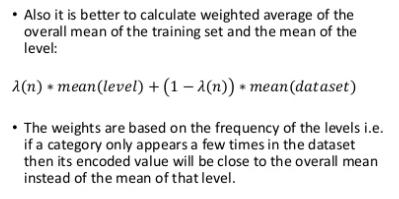

Here lambda is the weight to be applied. One thing to remember in this weighting scheme is, if we put too much weight on the conditional mean value, we will overfit. If we put too much weight on the global mean, we will underfit.

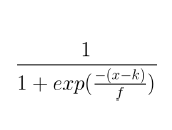

If the weight is in above form it is called Target encoding. Here K, f are two tunable parameters. Where f is called smoothing parameter, and k is called min_samples_leaf parameter. For more information see [this](https://contrib.scikit-learn.org/categorical-encoding/targetencoder.html). We should tune the parameter such that rarely occurred levels have the encoding vale of mean of target variable(global mean). 

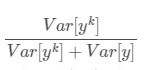

If the weight is calculated by above formula then it is called James-Stein Encoder. The best thing is it has no tuning parameter. But it designed for continuous target variable and the assumption is it is normally distributed. We can apply it to classification problem with some hacks. For more information see [this](https://contrib.scikit-learn.org/categorical-encoding/jamesstein.html).

## Target Encoding

In [38]:
# let's consider the demo data set
df=pd.DataFrame({'A':['a','b','c','a','b','c','a','b','c'],
                 'target':[1,0,1,0,1,1,0,1,0]
                })
df

,A,target
0,a,1
1,b,0
2,c,1
3,a,0
4,b,1
5,c,1
6,a,0
7,b,1
8,c,0


In [39]:
X = df.drop('target', axis = 1).values
y = df.target.values

Mean_encoding=ce.target_encoder.TargetEncoder(min_samples_leaf=1)
X_new=Mean_encoding.fit_transform(X,y)
X_new  

# The default regularization parameter values are  smoothing=1 and min_samples_leaf=1

,0
0,0.359823
1,0.653422
2,0.653422
3,0.359823
4,0.653422
5,0.653422
6,0.359823
7,0.653422
8,0.653422


In [40]:
# Validation for level 'a'
import math
smove=1/(1+math.exp(-((3-1)/1)))
target_mean=df.target.mean()
smoothing=((target_mean)*(1-smove))+((1/3)*smove)
smoothing

0.3598228715604706

In [41]:
# Validation for level 'b','c'
smove=1/(1+math.exp(-((3-1)/1)))
target_mean=df.target.mean()
smoothing=((target_mean)*(1-smove))+((2/3)*smove)
smoothing

0.6534218975530981

In [42]:
df=pd.DataFrame({'A':['a','b','c','a','b','c','a','b','c','a','b','c','a','b','c','a','b','c','d','d'],
                 'target':[1,0,1,0,1,1,0,1,0,1,0,1,0,1,1,0,1,0,0,0]
                })
df['A'].value_counts()

c    6
a    6
b    6
d    2
Name: A, dtype: int64

In [43]:
X = df.drop('target', axis = 1).values
y = df.target.values

Mean_encoding=ce.target_encoder.TargetEncoder()
min_samples_leaf_as_1=Mean_encoding.fit_transform(X,y)
df['min_samples_leaf_as_1']=min_samples_leaf_as_1
df


,A,target,min_samples_leaf_as_1
0,a,1,0.334449
1,b,0,0.665551
2,c,1,0.665551
3,a,0,0.334449
4,b,1,0.665551
5,c,1,0.665551
6,a,0,0.334449
7,b,1,0.665551
8,c,0,0.665551
9,a,1,0.334449


In [44]:
Mean_encoding=ce.target_encoder.TargetEncoder(min_samples_leaf=5)
min_samples_leaf_as_5=Mean_encoding.fit_transform(X,y)
df['min_samples_leaf_as_5']=min_samples_leaf_as_5
df

,A,target,min_samples_leaf_as_1,min_samples_leaf_as_5
0,a,1,0.334449,0.378157
1,b,0,0.665551,0.621843
2,c,1,0.665551,0.621843
3,a,0,0.334449,0.378157
4,b,1,0.665551,0.621843
5,c,1,0.665551,0.621843
6,a,0,0.334449,0.378157
7,b,1,0.665551,0.621843
8,c,0,0.665551,0.621843
9,a,1,0.334449,0.378157


In [45]:
Mean_encoding=ce.target_encoder.TargetEncoder(min_samples_leaf=10)
min_samples_leaf_as_10=Mean_encoding.fit_transform(X,y)
df['min_samples_leaf_as_10']=min_samples_leaf_as_10
df

,A,target,min_samples_leaf_as_1,min_samples_leaf_as_5,min_samples_leaf_as_10
0,a,1,0.334449,0.378157,0.497002
1,b,0,0.665551,0.621843,0.502998
2,c,1,0.665551,0.621843,0.502998
3,a,0,0.334449,0.378157,0.497002
4,b,1,0.665551,0.621843,0.502998
5,c,1,0.665551,0.621843,0.502998
6,a,0,0.334449,0.378157,0.497002
7,b,1,0.665551,0.621843,0.502998
8,c,0,0.665551,0.621843,0.502998
9,a,1,0.334449,0.378157,0.497002


In [46]:
df.drop(['target'],axis=1,inplace=True)
df.drop_duplicates()

,A,min_samples_leaf_as_1,min_samples_leaf_as_5,min_samples_leaf_as_10
0,a,0.334449,0.378157,0.497002
1,b,0.665551,0.621843,0.502998
2,c,0.665551,0.621843,0.502998
18,d,0.134471,0.476287,0.499832


Observe the different encoding values with `min_samples_leaf` parameter values as 1(default value), 5(average of class level frequencies), 10 (half of sample size).  


- With value of 1 we can say it is overfitted(have you remember the rule that it's better to have encoded value near by global mean. The global mean in our case is around 0.5 but the encoded value is around 1.344, has relatively large difference).


- If we compare the results of min_samples_leaf=1,5 there is not much changed in the encoded value for 'a','b','c'. And also the rarely occurred level 'd' encoded value is nearly equal to global mean)


- For min_samples_leaf=10 gives high weightage to the global mean, hence the encoding value of each level becomes almost same. So 5 can be considered as best value for min_samples_leaf here in our case.  

If there are only a few samples per category, this method is not efficient.

## CatBoost Encoder

Cat Boost encoder is more efficient encoder which can overcome the data leakage and weighting problem. To know how catBoost encoder is implemented see [this](https://github.com/ThisIsVenkatesh/Different_Versions_of_Mean_Encoding/blob/master/CatBoostEcoding_Computation.ipynb).

In [47]:
df=pd.DataFrame({'A':['a','b','c','a','b','c','a','b','c','a','b','c','a','b','c','a','b','c','d','d'],
                 'target':[1,0,1,0,1,1,0,1,0,1,0,1,0,1,1,0,1,0,0,0]
                })
df['A'].value_counts()

c    6
a    6
b    6
d    2
Name: A, dtype: int64

In [48]:
df

,A,target
0,a,1
1,b,0
2,c,1
3,a,0
4,b,1
5,c,1
6,a,0
7,b,1
8,c,0
9,a,1


In [49]:
Mean_encoding=ce.cat_boost.CatBoostEncoder()
X_new=Mean_encoding.fit_transform(df['A'],df['target'])
X_new

,A
0,0.500000
1,0.500000
2,0.500000
3,0.750000
4,0.250000
5,0.750000
6,0.500000
7,0.500000
8,0.833333
9,0.375000


Each level has different encoding value based on number of time the combined pattern of the categorical variable and target variable appeared.